In [55]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Bach\anaconda3\python.exe -m pip install --upgrade pip' command.


In [56]:
from pathlib import Path
import pandas as pd #data analysis
from sklearn.model_selection import train_test_split #machine learning
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge, LogisticRegression, LogisticRegressionCV
import statsmodels.formula.api as sm #statistics and econometrics
import matplotlib.pylab as plt #plotting library
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline


In [57]:
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')
df = pd.concat([df1,df2],axis = 0)

In [58]:
# Add column Weekly Conumption - AlWeekly_Cons as the sum of 'Dalc' & 'Walc'
df['AlWeekly_Cons'] = round((df['Dalc']+ df['Walc'])/2,0) # 1- 10
df['AlWeekly_Sum'] = round((df['Dalc']+ df['Walc']),0) # 1- 10

#changed this to average as 1-10 spread the prediction too wide and didn't give the most conclusive prediction.

# Drop column G1 and G2 as we only need G3 - final grade and drop 'Dalc' and 'Walc' because we have the weekly sum
df = df.drop(columns = ['G1','G2','Dalc','Walc'],axis = 1)


In [59]:
# Add Success column with two value yes and no based on the G3 column
# We choose threshold of 11 to decide whether a student is academically successful or not (1 point bigger than average which is 10)
df['Success'] = df.apply(lambda x: 'yes' if x['G3'] >= 11 else 'no',axis = 1)
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  health absences  G3 AlWeekly_Cons  \
0       no      4         3      4       3        6   6           1.0   
1       no      5         3      3       3        4   6           1.0   
2       no      4         3      2       3       10  10           2.0   
3      yes      3         2      2       5        2  15           1.0   
4       no      4         3      2       5        4  10           2.0   

  AlWeekly_Sum Success  
0            2      no  
1            2      no  

In [60]:
#df = pd.read_csv('student.csv')
df
#df['Medu'] = df['Medu'].astype('category')
#df['Fedu'] = df['Fedu'].astype('category')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,health,absences,G3,AlWeekly_Cons,AlWeekly_Sum,Success
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,3,6,6,1.0,2,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,3,4,6,1.0,2,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,3,10,10,2.0,5,no
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,5,2,15,1.0,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,5,4,10,2.0,3,no
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,5,10,15,2.0,3,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,3,0,11,1.0,2,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,6,6,1.0,2,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,0,19,1.0,2,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,5,0,15,1.0,2,yes


In [62]:
#Check with running everything. 
#predictors = ['famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup','Pstatus'] #select the desired columns
predictors = [ 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
              'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 
              'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
              'goout', 'health', 'absences'] #remove FEDU

In [63]:
outcome = 'AlWeekly_Cons' #define the outcome variable
# partition data
# Check indexing
#make MEDU AND FEDU AS CATEGORICALS

X = pd.get_dummies(df[predictors], drop_first=True) #convert categorical variables into dummy

In [64]:
y = df[outcome] #assign the outcome to y
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #partition the data to train/test

student_lm = LinearRegression() #assign the linear regression model
student_lm.fit(train_X, train_y) #linear regeression on the training set

LinearRegression()

In [65]:
# print coefficients
print('intercept ', student_lm.intercept_)
pd.set_option('display.max_rows', None)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': student_lm.coef_}))

# print performance measures
regressionSummary(train_y, student_lm.predict(train_X))

intercept  1.4317884066789937
            Predictor  coefficient
0                Medu     0.047538
1                Fedu    -0.000029
2          traveltime     0.114159
3           studytime    -0.204345
4              famrel    -0.120391
5            freetime     0.039733
6               goout     0.268037
7              health     0.090097
8            absences     0.015943
9           address_U    -0.158487
10        famsize_LE3     0.165725
11          Pstatus_T     0.126132
12        Mjob_health    -0.176212
13         Mjob_other    -0.023092
14      Mjob_services     0.060019
15       Mjob_teacher     0.134906
16        Fjob_health     0.305083
17         Fjob_other     0.136846
18      Fjob_services     0.413899
19       Fjob_teacher     0.004786
20        reason_home     0.109977
21       reason_other     0.185248
22  reason_reputation     0.003499
23    guardian_mother    -0.151187
24     guardian_other    -0.102174
25      schoolsup_yes    -0.138875
26         famsup_yes    

In [66]:
pred_y = student_lm.predict(train_X) #prediction performance on the training set 

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, student_lm))
print('AIC : ', AIC_score(train_y, pred_y, student_lm))
print('BIC : ', BIC_score(train_y, pred_y, student_lm))

adjusted r2 :  0.24486107036695215
AIC :  1605.4410616989605
BIC :  1760.818324687464


As this prediction gives continuous,decimal value, for an integer/categorical outcome (1,2,3,4,5). I'm applying rounding to the predicted value. 

In [67]:
import numpy as np

# Use predict() to make predictions on a new set
student_lm_pred = student_lm.predict(valid_X)

# Round the predictions
student_lm_pred_rounded = np.round(student_lm_pred)
# Clip values to be within the range [1, 5]
student_lm_pred_clipped = np.clip(student_lm_pred_rounded, 1, 5)

result = pd.DataFrame({'Predicted': student_lm_pred_clipped, 'Actual': valid_y,
                       'Residual': valid_y - student_lm_pred_clipped}) #dataframe with three columns
print(result)

# Compute common accuracy measures
regressionSummary(valid_y, student_lm_pred_clipped)

     Predicted  Actual  Residual
155        3.0     2.0      -1.0
78         1.0     1.0       0.0
335        2.0     2.0       0.0
313        2.0     1.0      -1.0
99         2.0     1.0      -1.0
227        2.0     3.0       1.0
165        2.0     1.0      -1.0
94         2.0     1.0      -1.0
472        2.0     1.0      -1.0
307        2.0     4.0       2.0
549        2.0     2.0       0.0
168        2.0     1.0      -1.0
175        3.0     4.0       1.0
194        2.0     1.0      -1.0
280        2.0     2.0       0.0
255        2.0     2.0       0.0
342        2.0     2.0       0.0
217        2.0     2.0       0.0
52         3.0     4.0       1.0
49         2.0     1.0      -1.0
35         2.0     1.0      -1.0
378        3.0     4.0       1.0
310        2.0     2.0       0.0
101        1.0     1.0       0.0
576        3.0     5.0       2.0
369        3.0     4.0       1.0
324        3.0     3.0       0.0
245        1.0     1.0       0.0
86         2.0     2.0       0.0
446       

1.0


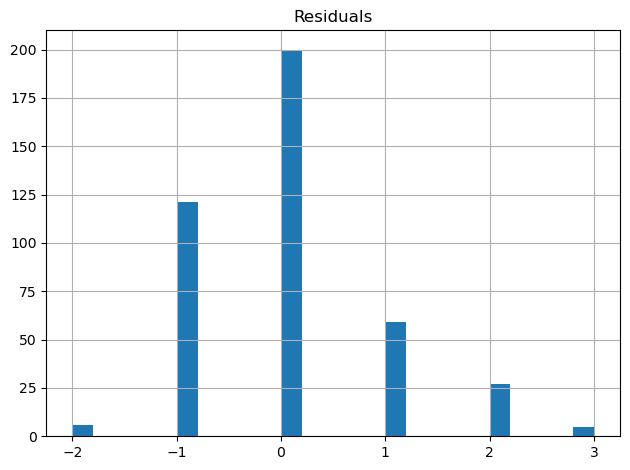

In [68]:
import matplotlib.pyplot as plt

# Predict on a new set
student_lm_pred = student_lm.predict(valid_X)

# Round the predictions
student_lm_pred_rounded = np.round(student_lm_pred)
# Clip values to be within the range [1, 5]
student_lm_pred_clipped = np.clip(student_lm_pred_rounded, 1, 5)

# Compute residuals based on the rounded and clipped predictions
all_residuals = valid_y - student_lm_pred_clipped

# Determine the percentage of datapoints with a residual in [-1406, 1406]
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

# Plotting the residuals
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso_cv = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LassoCV(cv=5)],
])
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv['model'].alpha_)
#print(lasso_cv['model'].coef_)

ridge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Ridge(alpha=1)],
])
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))

bayesianRidge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', BayesianRidge()],
])
bayesianRidge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Bayesian ridge chosen regularization: ',
      bayesianRidge['model'].lambda_ / bayesianRidge['model'].alpha_)


Regression statistics

                      Mean Error (ME) : 0.0069
       Root Mean Squared Error (RMSE) : 0.8872
            Mean Absolute Error (MAE) : 0.6741
          Mean Percentage Error (MPE) : -19.8794
Mean Absolute Percentage Error (MAPE) : 40.7928
Lasso-CV chosen regularization:  0.020254479126961704

Regression statistics

                      Mean Error (ME) : -0.0026
       Root Mean Squared Error (RMSE) : 0.8853
            Mean Absolute Error (MAE) : 0.6761
          Mean Percentage Error (MPE) : -19.5289
Mean Absolute Percentage Error (MAPE) : 40.9096

Regression statistics

                      Mean Error (ME) : 0.0027
       Root Mean Squared Error (RMSE) : 0.8904
            Mean Absolute Error (MAE) : 0.6779
          Mean Percentage Error (MPE) : -20.2636
Mean Absolute Percentage Error (MAPE) : 41.2369
Bayesian ridge chosen regularization:  107.4642134931068


In [70]:
linearRegression = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LinearRegression()],
])
linearRegression.fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0027
       Root Mean Squared Error (RMSE) : 0.8853
            Mean Absolute Error (MAE) : 0.6762
          Mean Percentage Error (MPE) : -19.5218
Mean Absolute Percentage Error (MAPE) : 40.9124


In [71]:
pd.DataFrame({
    'features': train_X.columns,
    'linear regression': linearRegression['model'].coef_,
    'lassoCV': lasso_cv['model'].coef_,
    'bayesianRidge': bayesianRidge['model'].coef_,
})

,features,linear regression,lassoCV,bayesianRidge
0,Medu,0.054689,0.004487,0.031745
1,Fedu,-0.000032,0.000000,0.013802
2,traveltime,0.084894,0.064872,0.079932
3,studytime,-0.175359,-0.166711,-0.152553
4,famrel,-0.115464,-0.085127,-0.090952
5,freetime,0.040282,0.015201,0.043841
6,goout,0.314657,0.300161,0.263394
7,health,0.126854,0.101833,0.101013
8,absences,0.086077,0.068113,0.078080
9,address_U,-0.070875,-0.049857,-0.059589


Logistic Regression

In [72]:
#Adding a column to split low and high alcohol consumption
df['Alcohol_Consumption_High'] = df['AlWeekly_Sum'].apply(lambda x: 0 if x < 4 else 1)



In [73]:
y_LR = df['Alcohol_Consumption_High'] #define the outcome variable

#classes = ['low', 'high']

# split into training and validation
train_X, valid_X, train_y_LR, valid_y_LR = train_test_split(X, y_LR, test_size=0.4,
                                                      random_state=1)

logit_red = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=5)
logit_red.fit(train_X, train_y_LR)

pd.set_option('display.width', 100)
print('regularization', logit_red.C_)
print('intercept ', logit_red.intercept_[0])
print(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=X.columns).transpose())
pd.reset_option('display.width')
print('AIC', AIC_score(valid_y_LR, logit_red.predict(valid_X), df=len(train_X.columns) + 1))


# confusion matrix
classificationSummary(valid_y_LR, logit_red.predict(valid_X))

regularization [21.5443469]
intercept  -1.9433203151914482
         Medu    Fedu  traveltime  studytime    famrel  freetime     goout    health  absences  \
coeff -0.0994  0.2159    0.139361  -0.324586 -0.514172  0.130686  0.670889  0.252657   0.04003   

       address_U  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
coeff  -0.273305  ...        -0.562494       -0.130687      -0.028247    -0.47078  0.315779   

       activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  
coeff       -0.056012    -0.421781   -0.433859      -0.07498     -0.081138  

[1 rows x 33 columns]
AIC 786.8911172014277
Confusion Matrix (Accuracy 0.6746)

       Prediction
Actual   0   1
     0 163  56
     1  80 119


In [74]:
from sklearn.metrics import classification_report, accuracy_score
print("Logitisc Regression Report without Upsampling:")

print(classification_report(valid_y_LR, logit_red.predict(valid_X)))
print("accuracy:",accuracy_score(valid_y_LR,logit_red.predict(valid_X)))

Logitisc Regression Report without Upsampling:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       219
           1       0.68      0.60      0.64       199

    accuracy                           0.67       418
   macro avg       0.68      0.67      0.67       418
weighted avg       0.68      0.67      0.67       418

accuracy: 0.6746411483253588


Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

              feature  importance       std
6               goout    0.075909  0.018751
8            absences    0.075654  0.019122
5            freetime    0.058757  0.016795
7              health    0.056762  0.015977
3           studytime    0.056053  0.015477
4              famrel    0.055879  0.016628
0                Medu    0.054020  0.016194
1                Fedu    0.052993  0.015238
2          traveltime    0.041341  0.013542
28     activities_yes    0.031783  0.013931
26         famsup_yes    0.030006  0.011981
10        famsize_LE3    0.028889  0.011606
32       romantic_yes    0.026911  0.011487
20        reason_home    0.024821  0.011924
13         Mjob_other    0.023048  0.010028
14      Mjob_services    0.023003  0.011193
9           address_U    0.022718  0.009349
18      Fjob_services    0.022659  0.010108
17         Fjob_other    0.022047  0.010693
22  reason_reputation    0.022024  0.010421
25      schoolsup_yes    0.021945  0.010552
29        nursery_yes    0.02134

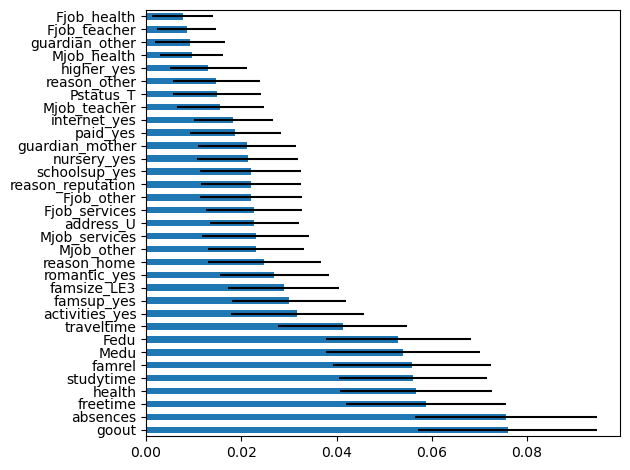

In [80]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance', ascending=False)
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [81]:

classificationSummary(valid_y, rf.predict(valid_X))


Confusion Matrix (Accuracy 0.6938)

       Prediction
Actual   0   1   2   3   4
     0 100  57   0   0   0
     1  22 156   1   0   0
     2   4  14  16   0   0
     3   4  19   0  15   0
     4   2   3   0   2   3


In [82]:
from sklearn.metrics import classification_report, accuracy_score
print("Logitisc Regression Report without Upsampling:")

print(classification_report(valid_y, rf.predict(valid_X)))
print("accuracy:",accuracy_score(valid_y,rf.predict(valid_X)))

Logitisc Regression Report without Upsampling:
              precision    recall  f1-score   support

         1.0       0.76      0.64      0.69       157
         2.0       0.63      0.87      0.73       179
         3.0       0.94      0.47      0.63        34
         4.0       0.88      0.39      0.55        38
         5.0       1.00      0.30      0.46        10

    accuracy                           0.69       418
   macro avg       0.84      0.53      0.61       418
weighted avg       0.73      0.69      0.68       418

accuracy: 0.69377990430622
